<a href="https://colab.research.google.com/github/EdisonMoreira/-aquecimento-formacao-infra/blob/master/Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Escritório de Dados</font>

## Aquecimento para Formação de Infraestrutura
## Edison Moreira
### Iplanrio / Diretoria de Sistemas (DSI) / Gerência de Arquitetura e Integrações (GAI)

## Pipeline
### Etapa 1: Entendendo os dados 🎲

- **Objetivo:** nessa etapa, você deve somente ingerir dados da API do `randomuser.me` e observar o formato dos dados, tentando imaginar como eles poderiam ser usados para construir uma tabela.
- **Descrição da solução:** a solução dessa etapa consiste em uma função para consumir a API na URL `https://randomuser.me/api/` e retornar um dicionário com os dados.

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.10


In [2]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Import da package para tratamento de acesso a uma API
import requests

## Ingerindo os Dados

Acessando os dados na API Random User

Confirmando o sucesso do acesso que é 
API Status Code 200: Everything went okay, 
and the result has been returned (if any).

In [4]:
response = requests.get("https://randomuser.me/api/")
print(response.status_code)

200


Exibindo o conteúdo do response que tem o formato json,
sendo a formatação de dictionary

In [5]:
response.json()

{'results': [{'gender': 'male',
   'name': {'title': 'Mr', 'first': 'Mathis', 'last': 'Dubois'},
   'location': {'street': {'number': 4500, 'name': 'Rue des Abbesses'},
    'city': 'Orléans',
    'state': 'Vienne',
    'country': 'France',
    'postcode': 57064,
    'coordinates': {'latitude': '-18.5116', 'longitude': '-33.5086'},
    'timezone': {'offset': '-5:00',
     'description': 'Eastern Time (US & Canada), Bogota, Lima'}},
   'email': 'mathis.dubois@example.com',
   'login': {'uuid': 'a337aaf8-2754-4e5e-9608-1609a3a61b58',
    'username': 'beautifulleopard198',
    'password': 'girl',
    'salt': 'lCvr6w5f',
    'md5': '17748ac6b92f6b51ff29139b05d6a8d7',
    'sha1': 'fd3fd33ffa3e018a13b1d7de19fe67b7092a9dea',
    'sha256': '631e4beedb540b39072a6afefd9ad5fcec349c0968270775f098f2209bbac61a'},
   'dob': {'date': '1968-02-21T04:26:55.208Z', 'age': 55},
   'registered': {'date': '2002-07-25T21:55:38.331Z', 'age': 20},
   'phone': '04-26-40-73-50',
   'cell': '06-59-46-87-45',
   'id

### Etapa 2: Coletando dados 💾

- **Objetivo:** nessa etapa, você deve coletar dados da API e armazená-los em um arquivo CSV.
- **Descrição da solução:** a solução dessa etapa consiste em uma função para coletar uma quantidade `n` de dados da API (sendo `n` um valor fornecido via parâmetro da função), manipulá-los para montar um `pandas.DataFrame` e salvar o resultado em um arquivo CSV.
**Dicas:**
  - Para tornar os dados mais fáceis de manipular no futuro, faça com que o `DataFrame` seja "plano", ou seja, cada coluna seja um único atributo do objeto.
  - Para ter dados suficientes para uma análise razoável nas próximas etapas, recomendamos `n>=500`.

> Criar função qu receba parametro Args1 para fazer Args1 acessos a API
Juntando cada leitura (append) ao dicitionario

In [6]:
# Import da packages
# para tratamento de acesso a uma API
# para criação e processamento de Pandas Dataframe
import pandas as pd
pd.set_option("display.max.columns", None)

In [7]:
# Função para coletar uma quantidade n de dados da API (sendo n um valor fornecido via parâmetro da função),
def coletaDado (quantidadeDado: int):
    parametroAPI="https://randomuser.me/api/?results=" + str(quantidadeDado)
    print(parametroAPI)
    return requests.get(parametroAPI)

In [8]:
responseDados = coletaDado(200)
print(responseDados.status_code)

https://randomuser.me/api/?results=200
200


In [9]:
responseDict=responseDados.json()

In [10]:
# Use json_normalize() to convert JSON (dict, list of dicts) to DataFrame Plano, cada campo uma coluna
import json
from pandas import json_normalize
df = json_normalize(responseDict['results']) 

In [11]:
pip install phonenumbers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 58.7 MB/s eta 0:00:00


In [12]:
import phonenumbers

In [13]:
# Padrão E.164 formato Internacional
# Phones que contem letras são desprezados
# A Python program to demonstrate working of re.match().
import re
 
# Lets use a regular expression to dismatch a phone string
# within alphabet characters
regex = r"([0-9 -()]+)"


for ind in df.index:
    match = re.search(regex, df['phone'][ind])
    if match is True:
      phoneIntAux = phonenumbers.parse(df['phone'][ind], df['nat'][ind])
      phoneInt = phonenumbers.format_number(phoneIntAux, phonenumbers.PhoneNumberFormat.INTERNATIONAL)
      df.loc[ind, 'phone']  = phoneInt    

In [14]:
# Padrão E.164 formato Internacional
# Celulares que contem letras são desprezados
# A Python program to demonstrate working of re.match().

for ind in df.index:
   match = re.search(regex, df['cell'][ind])
   if match == None:
     cellIntAux = phonenumbers.parse(df['cell'][ind], df['nat'][ind])
     cellInt = phonenumbers.format_number(phoneIntAux, phonenumbers.PhoneNumberFormat.INTERNATIONAL)
     df.loc[ind, 'cell']  = cellInt
   

### Etapa 4: Analisando dados sem agrupamento 📊

- **Objetivo**: com seus dados devidamente tratados, você deve gerar os seguintes itens:
  - Um relatório em texto (não precisa de formatação) contendo:
    - A porcentagem dos usuários por gênero
    - A porcentagem dos usuários por país
  - Uma imagem contendo um gráfico de distribuição da idade dos usuários (a biblioteca utilizada para o `plot` pode ser qualquer uma).
- **Descrição da solução**: uma função que recebe, como parâmetro, um `pandas.DataFrame` e gera dois arquivos: um relatório em texto e outro contendo um gráfico de distribuição da idade dos usuários.

In [15]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

### A porcentagem dos usuários por gênero

In [16]:
print(df["gender"].unique())
print(type(df["gender"].unique()))

['female' 'male']
<class 'numpy.ndarray'>


In [17]:
df['gender'].value_counts()

female    105
male       95
Name: gender, dtype: int64

In [18]:
dfSexos=pd.DataFrame(df['gender'].value_counts())

In [19]:
# Lista auxiliar Sexo
# para alterar o label da coluna gender
sexosLista = dfSexos.columns.tolist()
sexosLista[sexosLista.index('gender')] = 'usuarios'
dfSexos.columns = sexosLista

In [20]:
# Vamos calcular o percentual para cada genero
dfSexos['percentual'] = (dfSexos['usuarios'] / dfSexos['usuarios'].sum()) * 100

In [21]:
#Relatório básico 
display(dfSexos)

,usuarios,percentual
female,105,52.5
male,95,47.5


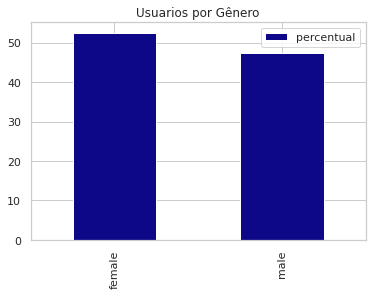

In [22]:
#Gráfico básico
dfSexos.plot(kind='bar',y='percentual', title = 'Usuarios por Gênero', colormap = 'plasma');

### A porcentagem dos usuários por país

Import da package para acesso e tratamento dos países (Country)

In [23]:
# Instala o pacote
# https://pypi.org/project/pycountry/
!pip install -q pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 76.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [24]:
# Listas auxiliares Paises
import pycountry
nomes_paises = []

In [25]:
df.head()

,gender,email,phone,cell,nat,name.title,name.first,name.last,location.street.number,location.street.name,location.city,location.state,location.country,location.postcode,location.coordinates.latitude,location.coordinates.longitude,location.timezone.offset,location.timezone.description,login.uuid,login.username,login.password,login.salt,login.md5,login.sha1,login.sha256,dob.date,dob.age,registered.date,registered.age,id.name,id.value,picture.large,picture.medium,picture.thumbnail
0,female,alice.sullivan@example.com,(401) 794-1230,(658) 623-4841,US,Mrs,Alice,Sullivan,3122,Locust Rd,Los Lunas,Kentucky,United States,64014,85.5533,30.4288,+3:00,"Baghdad, Riyadh, Moscow, St. Petersburg",0e694785-96ef-4867-9f57-e2779512ae72,lazywolf268,freeze,A58FABu7,799478ea4950278212e1907e003eeecb,3f627be5457f9fce51b9a953344254b98b2bc44b,455acd256dad0c9b7e57581bdb33f5f32e66ea144a4a3e...,1970-03-01T09:42:12.023Z,53,2012-03-23T12:35:49.636Z,10,SSN,209-87-9827,https://randomuser.me/api/portraits/women/55.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
1,male,ronald.carpenter@example.com,021-884-7860,081-844-8144,IE,Mr,Ronald,Carpenter,204,South Street,Ratoath,Cavan,Ireland,74173,-47.8104,-37.1697,-2:00,Mid-Atlantic,099e8467-c713-41fd-bee4-b80d160cc0ba,redelephant701,181818,PKD9F3zk,37a86ac0fbd6e9987b2da2de85a82795,531412d218b47c2eccac130acb8b4ca0f8d6c637,f25cd43bcd77a1f3b223348001506c2b9e74e43e099e30...,1958-01-07T04:24:58.052Z,65,2017-11-12T17:01:49.756Z,5,PPS,9740492T,https://randomuser.me/api/portraits/men/12.jpg,https://randomuser.me/api/portraits/med/men/12...,https://randomuser.me/api/portraits/thumb/men/...
2,female,astrid.thomsen@example.com,54206500,75358060,DK,Ms,Astrid,Thomsen,935,Dragebakken,Odense Sv,Syddanmark,Denmark,75424,16.7370,-8.7161,+3:30,Tehran,f8d620a4-a3c2-44dc-acda-1e76d276fc70,smallrabbit596,pizza,P1HCcKZa,789528b950709638644eded3585f7a1c,89b818784dc9b5e5d9b3ec61334a9de0e5d3dbd1,0acd2ffa3691124f4d78d9c81ae3f8dfce9edc9cd1888d...,1965-03-01T07:10:43.911Z,58,2007-08-11T12:12:40.132Z,15,CPR,010365-5774,https://randomuser.me/api/portraits/women/48.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
3,female,ruza.mancic@example.com,031-4424-374,065-3540-416,RS,Ms,Ruža,Mančić,5014,Stefana Radoslava,Zvečan,North Banat,Serbia,96842,-15.9992,150.9085,+6:00,"Almaty, Dhaka, Colombo",34e2fc91-29fb-4ad8-b09d-0bcc85489740,orangebear747,hurley,zsHR9uRO,d086bb65fab2f1321f18c8dd79302a78,58da32af58a95b505aa713d0c876192fa03e87c6,446029ddea31383cd89b9e62f753884e76c76b087844fe...,1983-10-26T07:45:13.721Z,39,2013-01-15T22:09:44.876Z,10,SID,160645063,https://randomuser.me/api/portraits/women/39.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
4,male,eelis.kotila@example.com,05-170-782,043-441-11-84,FI,Mr,Eelis,Kotila,201,Verkatehtaankatu,Lempäälä,Central Ostrobothnia,Finland,84218,28.8880,9.3075,+1:00,"Brussels, Copenhagen, Madrid, Paris",00c958d1-908c-4c7c-8b6b-c8df6f648bf5,greenbird144,fiction,jGiASo97,b89a7aad0f5b3c6f15dcd1fc384f7a46,06c4751b491a31bbc34787a9d41ac5f2ce6b9cca,4bdaa6eb14b3f14b30c311f424422ff5e4f8248f7672a8...,1975-01-19T10:44:22.768Z,48,2020-02-28T15:33:48.503Z,3,HETU,NaNNA445undefined,https://randomuser.me/api/portraits/men/41.jpg,https://randomuser.me/api/portraits/med/men/41...,https://randomuser.me/api/portraits/thumb/men/...


In [26]:
# Loop para obter o país de acordo com a região
#tratar a contagem desagrupada
for i in range(df.shape[0]):
    try:
        pais = df['nat'].values[i]
        paisDescricao=pycountry.countries.get(alpha_2=pais).name
        nomes_paises.append(paisDescricao)
    except:
        continue

In [27]:
# Prepara e exibe um dictonary com a contagem de usuarios por pais
from collections import Counter
dict_usuario_pais = dict(Counter(nomes_paises))
display(dict_usuario_pais)


{'United States': 6,
 'Ireland': 9,
 'Denmark': 10,
 'Serbia': 7,
 'Finland': 13,
 'India': 9,
 'Australia': 12,
 'Mexico': 11,
 'Ukraine': 11,
 'France': 9,
 'Canada': 6,
 'Switzerland': 7,
 'Germany': 14,
 'New Zealand': 10,
 'Spain': 8,
 'Turkey': 5,
 'Norway': 14,
 'Iran, Islamic Republic of': 8,
 'Netherlands': 11,
 'United Kingdom': 13,
 'Brazil': 7}

In [28]:
type(dict_usuario_pais)

dict

In [29]:
# Transform dictonary into a new dataframe
df_usuarios_pais=pd.DataFrame.from_dict(dict_usuario_pais, orient='index', columns=['Usuarios'])


In [30]:
#Relatório básico
df_usuarios_pais.head()

,Usuarios
United States,6
Ireland,9
Denmark,10
Serbia,7
Finland,13


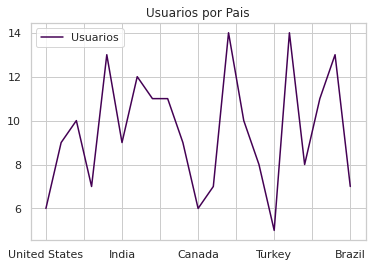

In [31]:
#Gráfico básico, sem exibição do nome de todos os paises que tem usuários
df_usuarios_pais.plot(y='Usuarios', title = 'Usuarios por Pais', colormap = 'viridis');

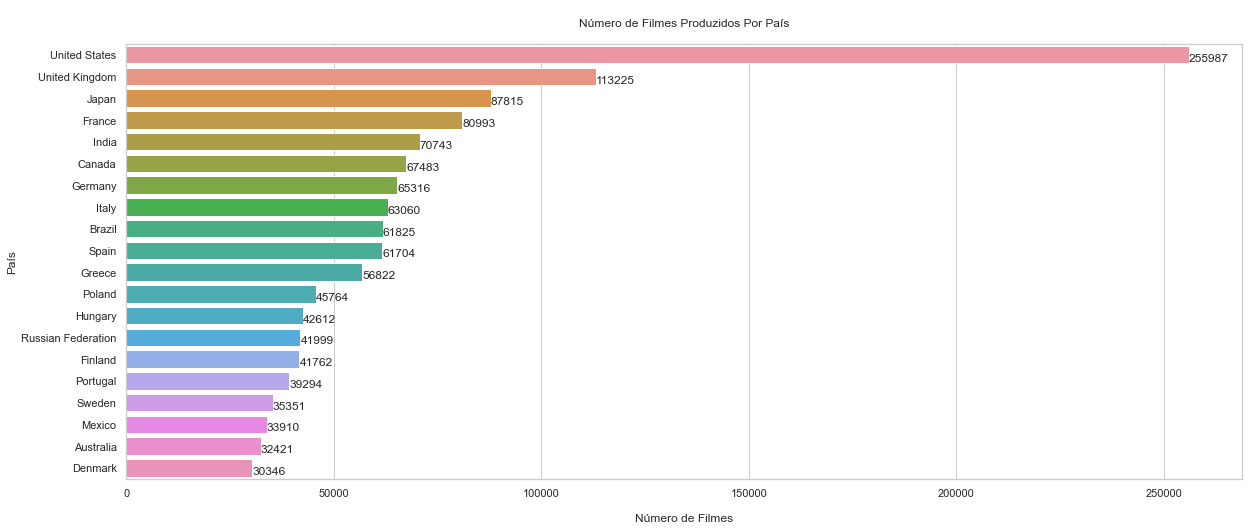

In [ ]:
# Plot

# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

## 9- Quais São os Top 10 Melhores Filmes?

Top 10 filmes com melhor avaliação e mais de 25 mil votos.

In [ ]:
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

## 10- Quais São os Top 10 Piores Filmes?

Top 10 filmes com pior avaliação e mais de 25 mil votos.

In [ ]:
# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>

Parabéns se você chegou até aqui. Use o voucher PYTHONDSA9642 para comprar qualquer curso ou Formação da DSA com 5% de desconto.